##PACKAGES

In [ ]:
!pip install shap==0.42.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import shap
import xgboost as xgb
from scipy import interp
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    classification_report
)
from sklearn.model_selection import (
    cross_val_score,
    cross_val_predict,
    LeaveOneOut,
    GridSearchCV,
    RandomizedSearchCV,
    train_test_split,
    cross_validate
)
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
import joblib
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LogisticRegression


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
packages = [
    "numpy",
    "pandas",
    "seaborn",
    "matplotlib",
    "shap",
    "xgboost",
    "scipy",
    "sklearn",
    "joblib"
]

versions = {}
for package in packages:
    versions[package] = __import__(package).__version__

###Package versions

In [ ]:
print(versions)

{'numpy': '1.25.2', 'pandas': '1.5.3', 'seaborn': '0.13.1', 'matplotlib': '3.7.1', 'shap': '0.42.1', 'xgboost': '2.0.3', 'scipy': '1.11.4', 'sklearn': '1.2.2', 'joblib': '1.3.2'}


Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**DATA**

In [ ]:
url = "https://raw.githubusercontent.com/resendislab/POST_COVID_Metabolome_MachineLearning/main/Data/Data.csv"

In [ ]:
#data import
data = pd.read_csv(url)
#data index
data = data.set_index('Folio')
columns_to_remove = ['GROUP']
data = data.drop(columns_to_remove, axis=1)
#Class encoder
le = LabelEncoder()
data['GROUP2'] = le.fit_transform(data['GROUP2'])

X = data.drop('GROUP2', axis=1)
y = data['GROUP2']

In [ ]:
X

,Lactate/Pyruvate,Ornithine/Citrulline,Glutamine/Glutamate,Kynurenine/Tryptophan,Creatinine,Glycine,Alanine,Serine,Proline,Valine,...,Hydroxybutyrylcarnitine,Octanoylcarnitine,Decadienylcarnitine,Decenoylcarnitine,Decanoylcarnitine,Dodecenoylcarnitine,Dodecanoylcarnitine,Hexadecanoylcarnitine,Octadecadienylcarnitine,Octadecenoylcarnitine
Folio,,,,,,,,,,,,,,,,,,,,,
CV19-0007A,46.385542,3.851852,0.781818,0.086000,166.0,230.0,236,117.0,151.0,170.0,...,0.2001,0.1216,0.0789,0.2072,0.2437,0.1584,0.1266,0.2262,0.1301,0.2876
CV19-0071A,43.375000,3.500000,3.745283,0.047414,67.0,233.0,343,89.2,151.0,145.0,...,0.0741,0.2256,0.0695,0.2310,0.3679,0.1526,0.1123,0.1534,0.1190,0.2378
CV19-0079A,79.741379,6.798030,2.066667,0.031845,69.2,250.0,371,129.0,175.0,207.0,...,0.0416,0.0951,0.0996,0.1439,0.1661,0.0977,0.0860,0.2005,0.1604,0.3066
CV19-0118A,32.037815,1.931034,2.058824,0.029863,54.2,190.0,415,103.0,165.0,149.0,...,0.0291,0.2326,0.0705,0.2509,0.3039,0.1262,0.0775,0.0983,0.0702,0.1598
CV19-0125A,39.357430,2.014085,4.863813,0.041209,63.1,189.0,373,94.5,167.0,158.0,...,0.0592,0.1857,0.0709,0.2856,0.3549,0.1938,0.1446,0.1281,0.0998,0.2283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV19-0830A,26.108597,6.527027,0.663755,0.216535,89.9,117.0,273,58.3,125.0,245.0,...,0.1570,0.1348,0.1569,0.2186,0.4441,0.1232,0.0938,0.1326,0.1060,0.2467
CV19-0833A,33.262411,4.000000,3.410072,0.190736,112.0,162.0,497,88.7,111.0,275.0,...,0.0738,0.2481,0.1557,0.3837,0.6554,0.1521,0.0903,0.1158,0.0797,0.1718
CV19-0834A,26.425532,9.014675,3.755411,0.099780,114.0,181.0,574,90.8,206.0,247.0,...,0.1481,0.2395,0.1776,0.3464,0.3441,0.2043,0.1211,0.1922,0.1354,0.3183


In [ ]:
y

Folio
CV19-0007A    0
CV19-0071A    0
CV19-0079A    0
CV19-0118A    0
CV19-0125A    0
             ..
CV19-0830A    1
CV19-0833A    1
CV19-0834A    1
CV19-0932A    1
CV19-0936A    1
Name: GROUP2, Length: 228, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)



##**HYPERPARAMETER** **TUNING**

###RF

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=56, scoring='accuracy')

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
parameters = {
  'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True
 }

###XGBOOST

In [ ]:
randomgrid_xgb = {
    'max_depth': randint(3, 7),
    'learning_rate': [0.1, 0.01, 0.2],
    'n_estimators': randint(50, 1001),
    'subsample': uniform(0.2, 0.6),
    'colsample_bytree': uniform(0.2, 0.6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'objective': 'multi:softmax',
}


In [ ]:
xgb_model= xgb.XGBClassifier()

In [ ]:
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=randomgrid_xgb, n_iter= 500, cv=5,random_state=56, verbose = 1, scoring='accuracy')


In [ ]:
xgb_random.fit(X_train, y_train)

#Print the best hyperparameters and evaluation scores
print("Best Hyperparameters: ", xgb_random.best_params_)
print("Best Score: ", xgb_random.best_score_)
print("Test Set Score: ", xgb_random.score(X_test, y_test))

In [ ]:
parametersxgb =   {'colsample_bytree': 0.38209767349268514, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 652, 'objective': 'a', 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.23245564923001028}

###SVM

In [ ]:
randomgrid_svm = {
    'C': uniform(loc=0.1, scale=100),
    'kernel': ['poly', 'rbf', 'linear'],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}


In [ ]:
svc_model = SVC()

In [ ]:
# Define the scoring metric
scorer = make_scorer(f1_score, average='macro')  # or average='micro' depending on your preference

# Create RandomizedSearchCV object
svm_random = RandomizedSearchCV(estimator=svc_model, param_distributions=randomgrid_svm,
                               n_iter=500, cv=5, random_state=56, verbose=2, scoring=scorer)


In [ ]:
svm_random.fit(X_train, y_train)

In [ ]:
svm_random.best_params_

In [ ]:
svm_bestparams = {'C': 98.51918505425766, 'gamma': 0.0001, 'kernel': 'linear'}

###LOGISTIC REGRESSION

In [ ]:
#Parameter grid
param_grid = {
    'penalty': ['l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['sag'],
    'multi_class': ['ovr', 'multinomial']
}

# Create a logistic regression classifier
logreg = LogisticRegression(max_iter=20000)

In [ ]:
# Perform random search with error_score='raise'
random_search = RandomizedSearchCV(logreg, param_distributions=param_grid, n_iter=500, cv=5, random_state=56, scoring = "accuracy", verbose = 2)
random_search.fit(X_train, y_train)

In [ ]:
random_search.best_params_

In [ ]:
logreg_params = {'solver': 'sag',
                 'penalty': 'l2',
                 'multi_class': 'multinomial',
                 'C': 0.0001}

#BEST PARAMETERS MODELS

In [ ]:
#Random Forest RSCV parameters
parameters = {
  'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True
 }

In [ ]:
#XGboost RSCV parameters
parametersxgb =   {'colsample_bytree': 0.38209767349268514, 'gamma': 0.4, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 652, 'objective': 'a', 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.23245564923001028}

In [ ]:
#SVM RSCV parameters
svm_bestparams = {'C': 98.51918505425766, 'gamma': 0.0001, 'kernel': 'linear'}

In [ ]:
#Logreg RSCV parameters
logreg_params = {'solver': 'sag',
                 'penalty': 'l2',
                 'multi_class': 'multinomial',
                 'C': 0.0001}

#MODELS

##RANDOM FOREST

In [ ]:
# Initialize the RandomForestClassifier with your desired parameters
rf_model = RandomForestClassifier(random_state=56, **parameters)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Perform k-fold cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=scoring)

# Access the cross-validation results
accuracy = cv_results['test_accuracy'].mean()
accuracy_deviation = cv_results['test_accuracy'].std()

precision = cv_results['test_precision_macro'].mean()
precision_deviation = cv_results['test_precision_macro'].std()

recall = cv_results['test_recall_macro'].mean()
recall_deviation = cv_results['test_recall_macro'].std()

f1 = cv_results['test_f1_macro'].mean()
f1_deviation = cv_results['test_f1_macro'].std()

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics on the test data
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Cross-validation results:")
print("Accuracy:", accuracy, "±", accuracy_deviation)
print("Precision:", precision, "±", precision_deviation)
print("Recall:", recall, "±", recall_deviation)
print("F1 Score:", f1, "±", f1_deviation)
print()

print("Test set results:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Cross-validation results:
Accuracy: 0.8906432748538011 ± 0.053296642760535425
Precision: 0.9046579346579346 ± 0.07673896522798755
Recall: 0.8484848484848484 ± 0.07323232323232326
F1 Score: 0.8539563190432755 ± 0.06695068064250245

Test set results:
Accuracy: 0.9565217391304348
Precision: 0.9791666666666666
Recall: 0.9111111111111111
F1 Score: 0.941400421875804


In [ ]:
#Get metrics
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Performance Metrics:")
print("====================")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(cm)

Performance Metrics:
Accuracy: 0.9565217391304348
Precision: 0.9791666666666666
Recall: 0.9111111111111111
F1-Score: 0.941400421875804
Confusion Matrix:
[[ 5  1  0]
 [ 0 30  0]
 [ 0  1  9]]


In [ ]:
# Model name
y_scores = rf_model.predict_proba(X_test)  # Get class probabilities
n_classes = len(rf_model.classes_)

# Binarize the y_test array
y_test_binary = label_binarize(y_test, classes=rf_model.classes_)

# Compute micro AUC
y_scores_micro = y_scores.ravel()
y_test_micro = y_test_binary.ravel()
micro_auc = roc_auc_score(y_test_micro, y_scores_micro, average='weighted', multi_class='ovo')

# Compute macro AUC
macro_auc = roc_auc_score(y_test_binary, y_scores, average='weighted', multi_class='ovo')

print("Micro AUC:", micro_auc)
print("Macro AUC:", macro_auc)

Micro AUC: 0.9867674858223062
Macro AUC: 0.9855978260869565


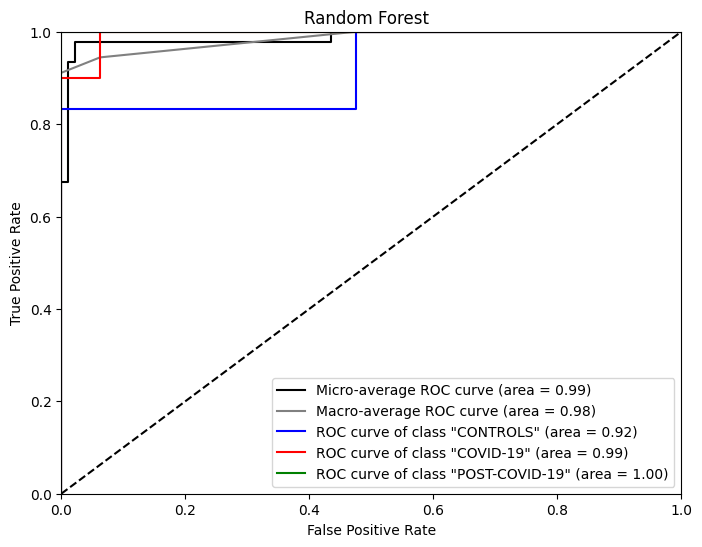

In [ ]:
#ROC curve graph
# Define class names
class_names = ['CONTROLS', 'COVID-19', 'POST-COVID-19']

# Define colors for each class ROC curve
class_colors = ['blue', 'red', 'green']  # Customize colors for each class ROC curve

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro), color='black')
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_macro), color='gray')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class "{0}" (area = {1:0.2f})'.format(class_names[i], roc_auc[i]), color=class_colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest  ')
plt.legend(loc='lower right')
plt.savefig('ROC_RF.png', dpi=600)
plt.show()


####SHAPS RF

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

In [ ]:
import pickle

with open('shap_values_RF.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

In [ ]:
feat_names = list(X.columns)
feature_names = X.columns

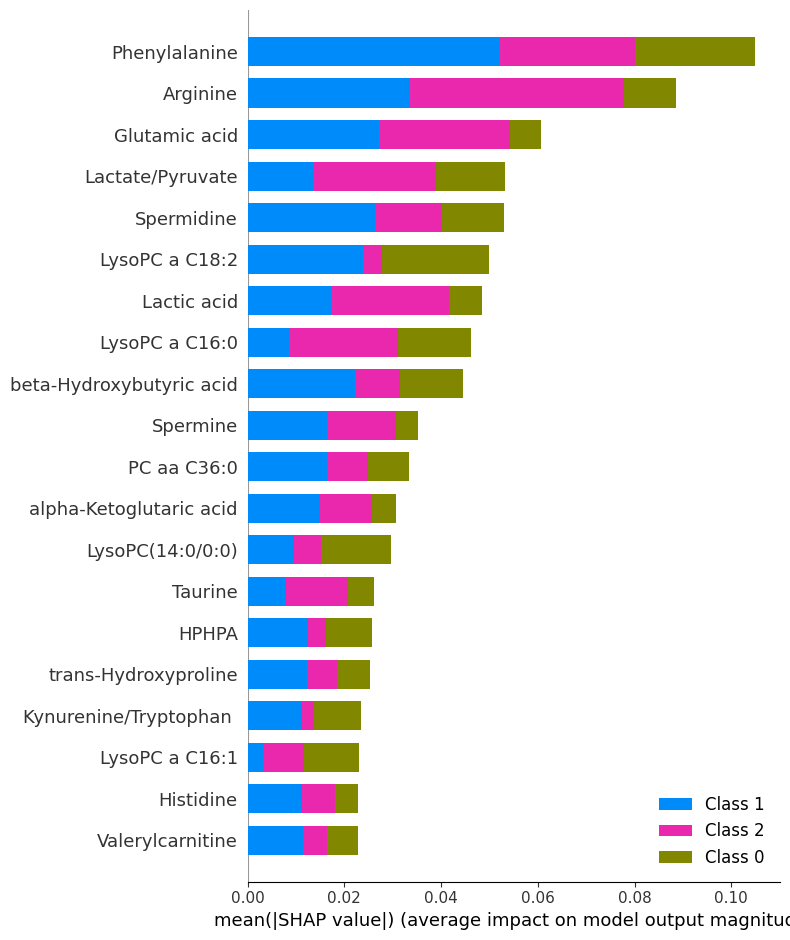

In [ ]:
shap.summary_plot(shap_values, X, feature_names=X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


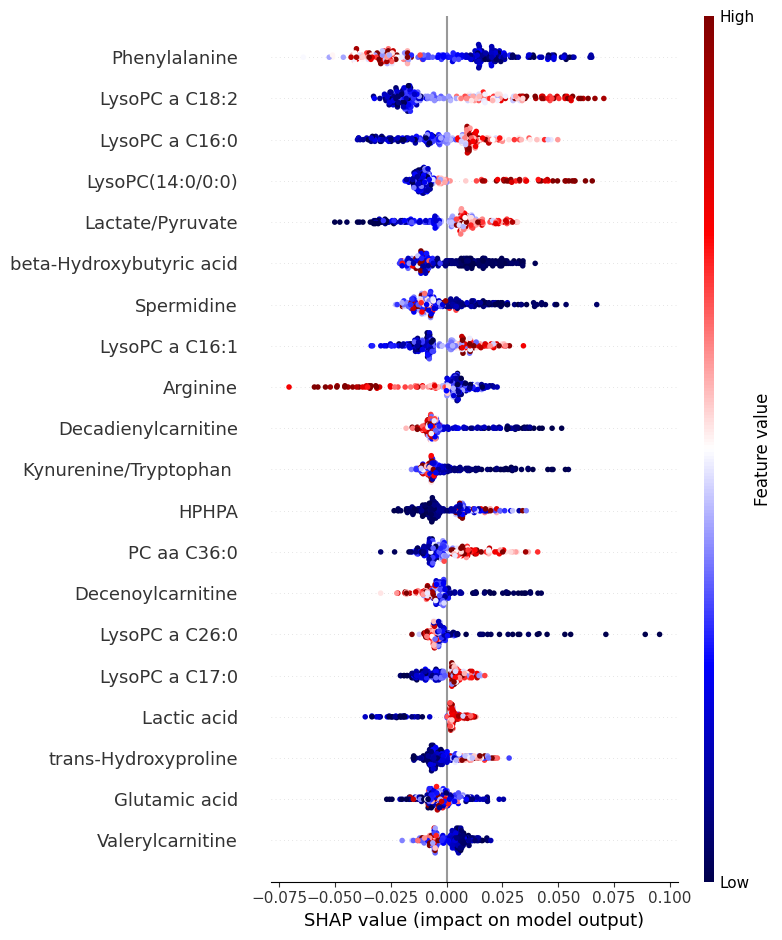

In [ ]:
shap.summary_plot(shap_values[0], X, cmap = "seismic")

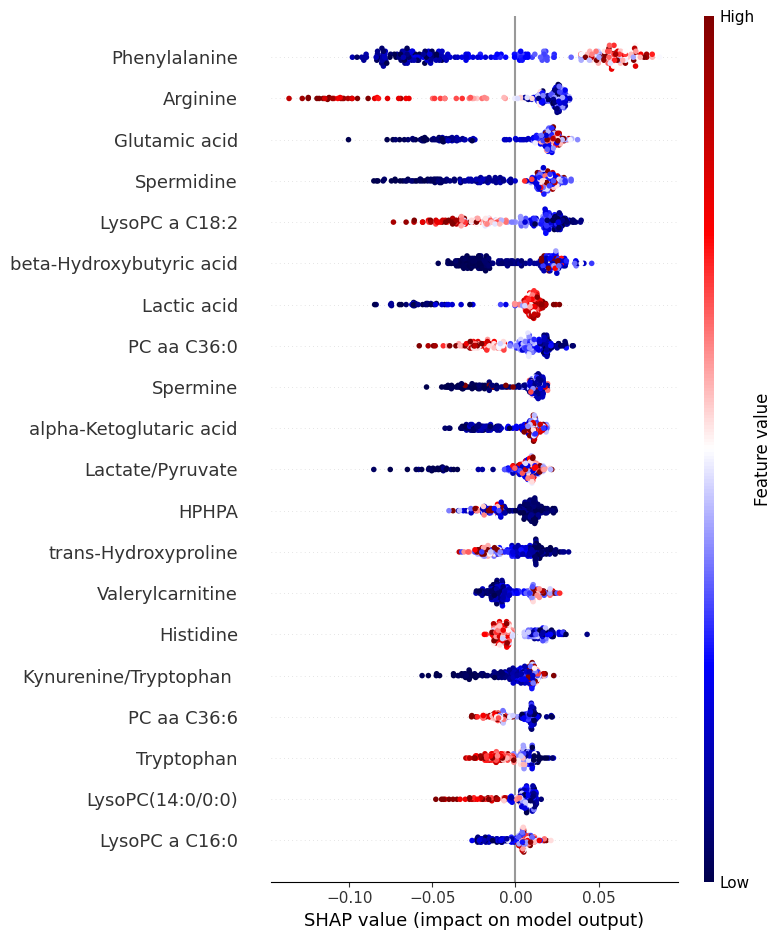

In [ ]:
shap.summary_plot(shap_values[1], X, cmap = "seismic")

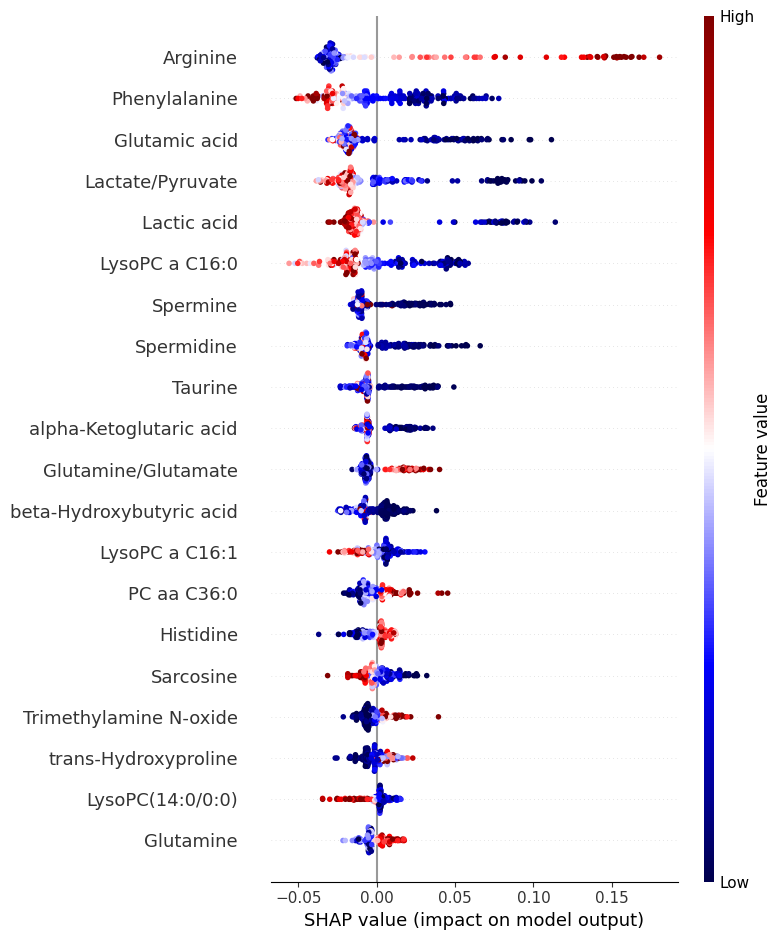

In [ ]:
shap.summary_plot(shap_values[2], X, cmap = "seismic")

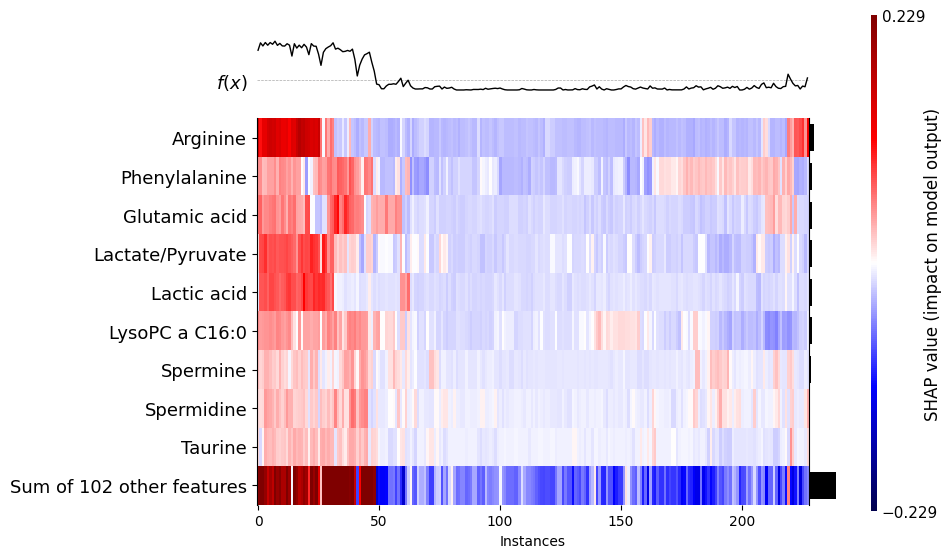

In [ ]:
shap_values_explaination = shap.Explanation(shap_values[2], feature_names=X_test.columns.tolist())
shap.plots.heatmap(shap_values_explaination, cmap='seismic')

##XGBOOST

In [ ]:
#xgboost model
xgb_model = xgb.XGBClassifier(random_state=56, **parametersxgb, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)

# Perform k-fold cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(xgb_model, X_train, y_train, cv=10, scoring=scoring)

# Access the cross-validation results
accuracy = cv_results['test_accuracy'].mean()
accuracy_deviation = cv_results['test_accuracy'].std()

precision = cv_results['test_precision_macro'].mean()
precision_deviation = cv_results['test_precision_macro'].std()

recall = cv_results['test_recall_macro'].mean()
recall_deviation = cv_results['test_recall_macro'].std()

f1 = cv_results['test_f1_macro'].mean()
f1_deviation = cv_results['test_f1_macro'].std()

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics on the test data
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Cross-validation results:")
print("Accuracy:", accuracy, "±", accuracy_deviation)
print("Precision:", precision, "±", precision_deviation)
print("Recall:", recall, "±", recall_deviation)
print("F1 Score:", f1, "±", f1_deviation)
print()

print("Test set results:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Cross-validation results:
Accuracy: 0.9067251461988304 ± 0.058719536740980904
Precision: 0.920172975172975 ± 0.06951446795453738
Recall: 0.8790404040404042 ± 0.07332326293656417
F1 Score: 0.8851375243114374 ± 0.06667776266575211

Test set results:
Accuracy: 0.9782608695652174
Precision: 0.989247311827957
Recall: 0.9444444444444445
F1 Score: 0.9642324888226527


In [ ]:
#get metrics
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
print("Performance Metrics:")
print("====================")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(cm)

Performance Metrics:
Accuracy: 0.9782608695652174
Precision: 0.989247311827957
Recall: 0.9444444444444445
F1-Score: 0.9642324888226527
Confusion Matrix:
[[ 5  1  0]
 [ 0 30  0]
 [ 0  0 10]]


In [ ]:
y_scores = xgb_model.predict_proba(X_test)  # Get class probabilities
n_classes = len(xgb_model.classes_)

# Binarize the y_test array
y_test_binary = label_binarize(y_test, classes=xgb_model.classes_)

# Compute micro AUC
y_scores_micro = y_scores.ravel()
y_test_micro = y_test_binary.ravel()
micro_auc = roc_auc_score(y_test_micro, y_scores_micro, average='weighted', multi_class='ovo')

# Compute macro AUC
macro_auc = roc_auc_score(y_test_binary, y_scores, average='weighted', multi_class='ovo')

print("Micro AUC:", micro_auc)
print("Macro AUC:", macro_auc)

Micro AUC: 0.9865311909262761
Macro AUC: 0.9815217391304347


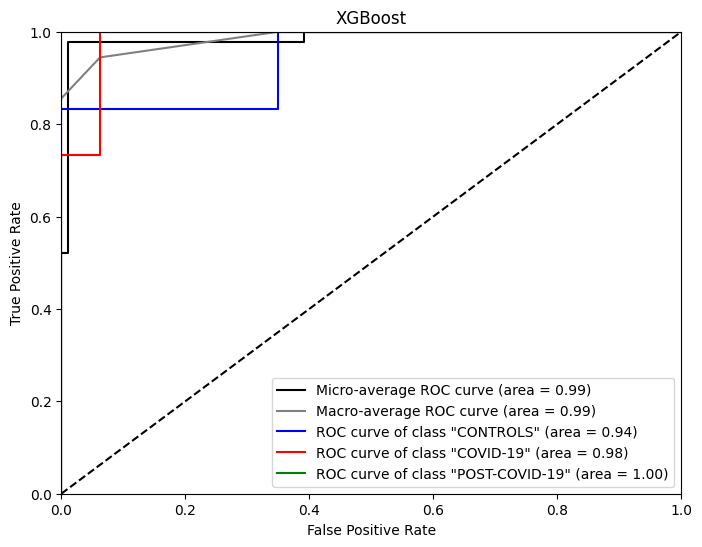

In [ ]:

# Define class names
class_names = ['CONTROLS', 'COVID-19', 'POST-COVID-19']

# Define colors for each class ROC curve
class_colors = ['blue', 'red', 'green']  # Customize colors for each class ROC curve

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro), color='black')
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_macro), color='gray')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class "{0}" (area = {1:0.2f})'.format(class_names[i], roc_auc[i]), color=class_colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost')
plt.legend(loc='lower right')
plt.savefig('ROC_curve_XGBOOST.png', dpi=600)
plt.show()

####SHAPS XGBOOST

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

[21:15:33] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
import pickle

with open('shap_values_XGBoost.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


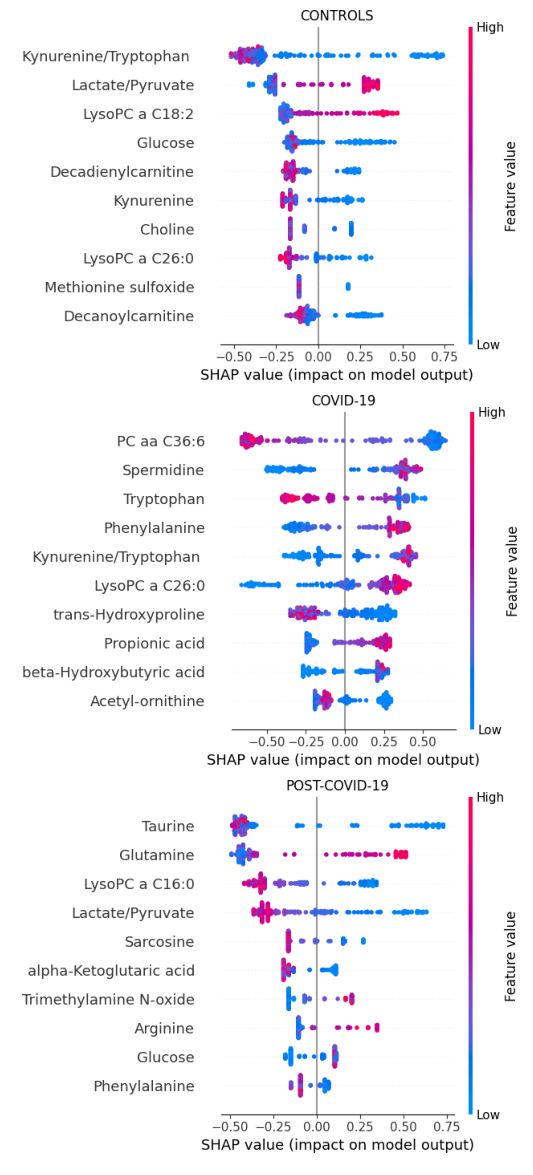

In [ ]:

def shap_plot_to_array(shap_values, X, title="", max_display=10):
    """Capture SHAP plot as an array"""
    fig, ax = plt.subplots()
    shap.summary_plot(shap_values, X, max_display=max_display, show=False, plot_size=None)
    plt.title(title)
    canvas = FigureCanvas(fig)
    canvas.draw()
    img_arr = np.array(canvas.renderer._renderer)
    plt.close(fig)
    return img_arr

# Define titles
titles = ['CONTROLS', 'COVID-19', 'POST-COVID-19']

# Capture each SHAP plot as an image array with titles
img1 = shap_plot_to_array(shap_values[0], X, title=titles[0], max_display=10)
img2 = shap_plot_to_array(shap_values[1], X, title=titles[1], max_display=10)
img3 = shap_plot_to_array(shap_values[2], X, title=titles[2], max_display=10)

# Combine the images vertically
combined_img = np.vstack((img1, img2, img3))

# Display the combined image using matplotlib
fig, ax = plt.subplots(figsize=(10, 15))
ax.imshow(combined_img)
ax.axis('off')
plt.savefig('shap_summary.png', dpi=600)
plt.show()


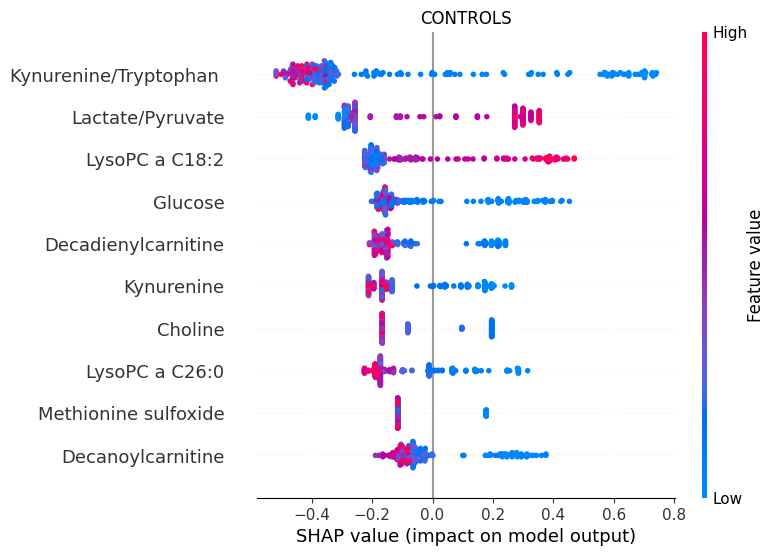

In [ ]:
shap.summary_plot(shap_values[0], X,max_display=10, show = False)
plt.title('CONTROLS')
plt.savefig('shap_summary_controlsML.png', dpi=600)
plt.show()

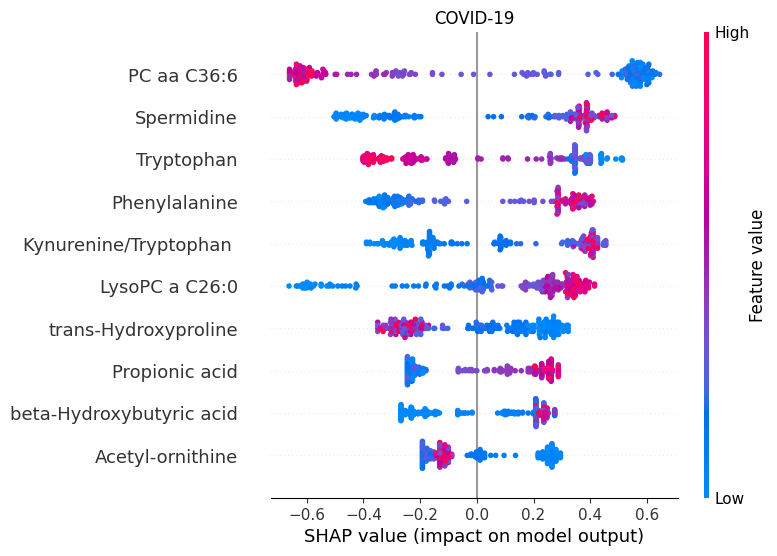

In [ ]:
shap.summary_plot(shap_values[1], X,max_display=10, show = False)
plt.title('COVID-19')
plt.savefig('shap_summary_covidML.png', dpi=600)
plt.show()

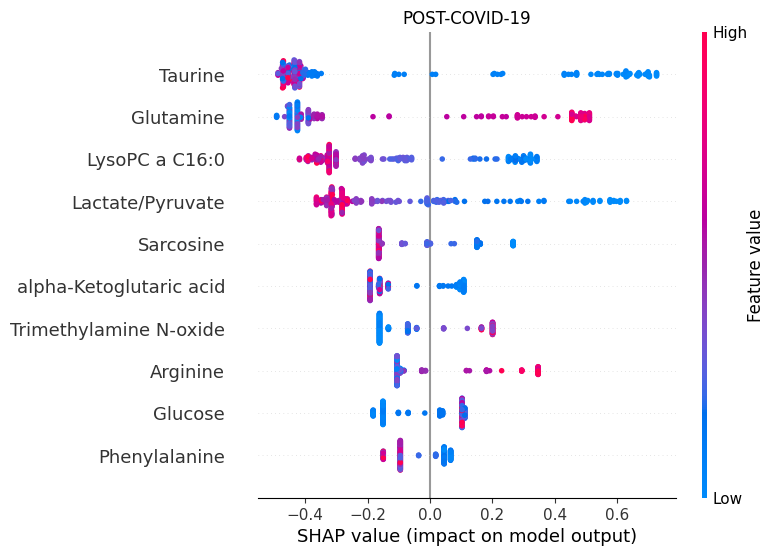

In [ ]:
shap.summary_plot(shap_values[2], X,max_display=10, show = False)
plt.title('POST-COVID-19')
plt.savefig('shap_summary_postcovidML.png', dpi=600)
plt.show()

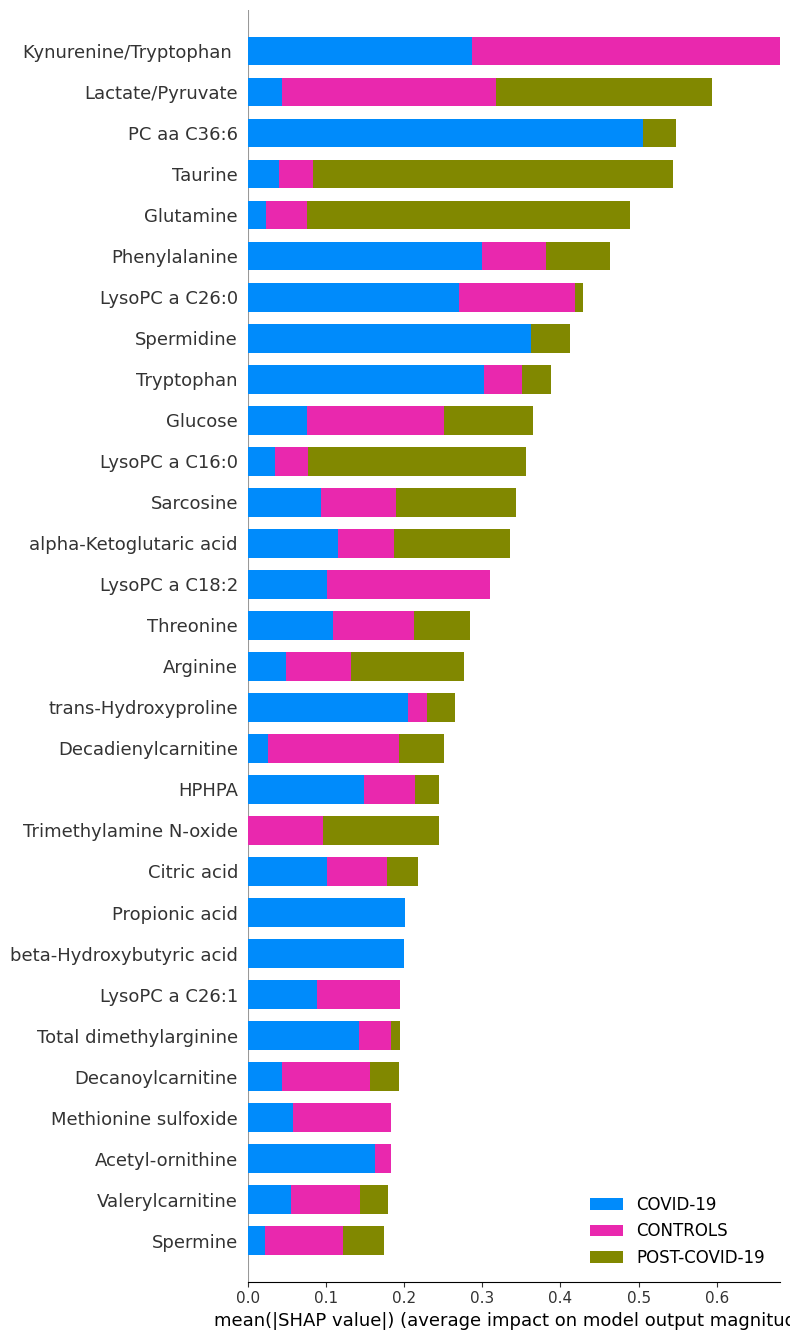

In [ ]:
class_labels = {
    0: 'CONTROLS',
    1: 'COVID-19',
    2: 'POST-COVID-19'
}

shap.summary_plot(shap_values, X,max_display=30, show=False, class_names=list(class_labels.values()))
plt.savefig('shap_summaryplot.png', dpi=600)
plt.show()


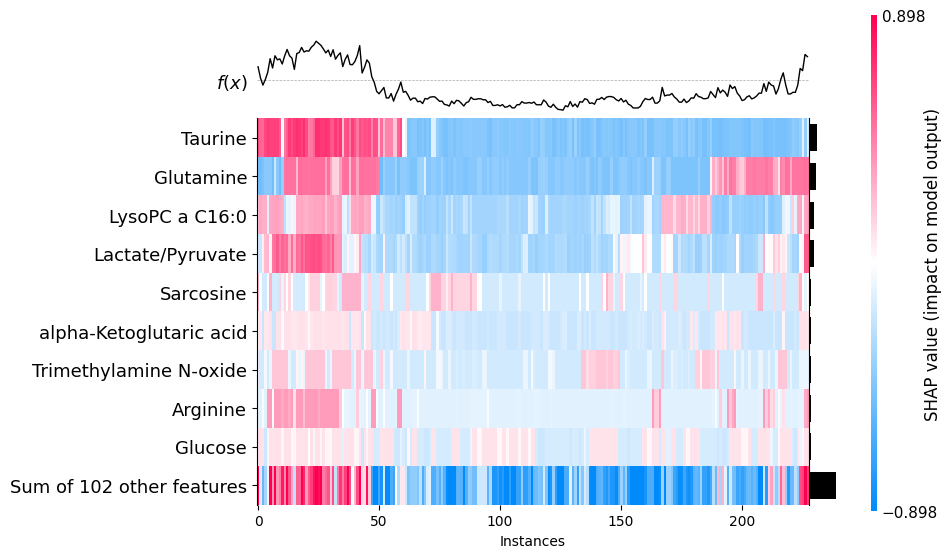

In [ ]:
shap_values_explaination = shap.Explanation(shap_values[2], feature_names=X.columns.tolist())
shap.plots.heatmap(shap_values_explaination)


In [ ]:
y_pred=xgb_model.predict(X_test)
misclassified=y_test!=y_pred
sum(misclassified) #total misclassified test observations

1

In [ ]:
pred_true_tbl=pd.DataFrame({'True':y_test,'Pred':y_pred,'Misclassified':misclassified})
display(pred_true_tbl[pred_true_tbl.Misclassified==True])
print(np.where(pred_true_tbl.Misclassified==True))  # Index location of misclassified predictions

,True,Pred,Misclassified
Folio,,,
CV19-0007A,0,1,True


(array([30]),)


In [ ]:
#Shap Force plot for 0th observation in test set
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[0][0,:], X_test.iloc[0,:])

##SVM

Linear

In [ ]:
# Define the SVM model
svm_model = SVC(random_state=56, **svm_bestparams, probability=True)
svm_model.fit(X_train, y_train)

# Perform k-fold cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(svm_model, X_train, y_train, cv=5, scoring=scoring)

# Access the cross-validation results
accuracy = cv_results['test_accuracy'].mean()
accuracy_deviation = cv_results['test_accuracy'].std()

precision = cv_results['test_precision_macro'].mean()
precision_deviation = cv_results['test_precision_macro'].std()

recall = cv_results['test_recall_macro'].mean()
recall_deviation = cv_results['test_recall_macro'].std()

f1 = cv_results['test_f1_macro'].mean()
f1_deviation = cv_results['test_f1_macro'].std()

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics on the test data
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Cross-validation results:")
print("Accuracy: {:.3f} ± {:.3f}".format(accuracy, accuracy_deviation))
print("Precision: {:.3f} ± {:.3f}".format(precision, precision_deviation))
print("Recall: {:.3f} ± {:.3f}".format(recall, recall_deviation))
print("F1 Score: {:.3f} ± {:.3f}".format(f1, f1_deviation))
print()

print("Test set results:")
print("Accuracy: {:.3f}".format(accuracy_test))
print("Precision: {:.3f}".format(precision_test))
print("Recall: {:.3f}".format(recall_test))
print("F1 Score: {:.3f}".format(f1_test))

Cross-validation results:
Accuracy: 0.819 ± 0.039
Precision: 0.793 ± 0.042
Recall: 0.785 ± 0.056
F1 Score: 0.782 ± 0.045

Test set results:
Accuracy: 0.804
Precision: 0.716
Recall: 0.700
F1 Score: 0.707


In [ ]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Performance Metrics:")
print("====================")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(cm)

Performance Metrics:
Accuracy: 0.8043478260869565
Precision: 0.7162485065710872
Recall: 0.6999999999999998
F1-Score: 0.7073626689675008
Confusion Matrix:
[[ 3  3  0]
 [ 1 27  2]
 [ 2  1  7]]


In [ ]:
# model
y_scores = svm_model.predict_proba(X_test)  # Get class probabilities
n_classes = len(svm_model.classes_)

# Binarize the y_test array
y_test_binary = label_binarize(y_test, classes=svm_model.classes_)

# Compute micro AUC
y_scores_micro = y_scores.ravel()
y_test_micro = y_test_binary.ravel()
micro_auc = roc_auc_score(y_test_micro, y_scores_micro, average='weighted', multi_class='ovo')

# Compute macro AUC
macro_auc = roc_auc_score(y_test_binary, y_scores, average='weighted', multi_class='ovo')

print("Micro AUC:", micro_auc)
print("Macro AUC:", macro_auc)

Micro AUC: 0.9284026465028355
Macro AUC: 0.9090881642512079


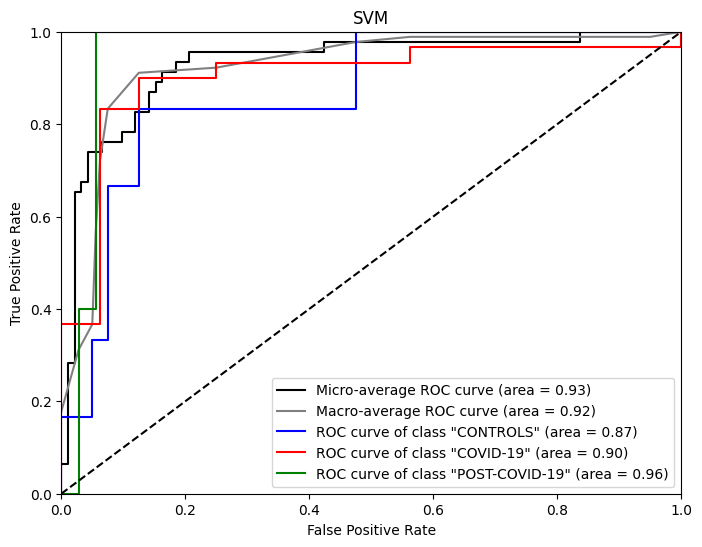

In [ ]:
# Define class names
class_names = ['CONTROLS', 'COVID-19', 'POST-COVID-19']

# Define colors for each class ROC curve
class_colors = ['blue', 'red', 'green']  # Customize colors for each class ROC curve

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro), color='black')
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_macro), color='gray')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class "{0}" (area = {1:0.2f})'.format(class_names[i], roc_auc[i]), color=class_colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM')
plt.legend(loc='lower right')
plt.savefig("roc_curve_SVM.png", dpi=600)
plt.show()

##LOGISTIC REGRESSION

In [ ]:
#LogReg
logreg_model = LogisticRegression(random_state=56, **logreg_params, max_iter=20000)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Perform k-fold cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(logreg_model, X_train, y_train, cv=10, scoring=scoring)

# Access the cross-validation results
accuracy = cv_results['test_accuracy'].mean()
accuracy_deviation = cv_results['test_accuracy'].std()

precision = cv_results['test_precision_macro'].mean()
precision_deviation = cv_results['test_precision_macro'].std()

recall = cv_results['test_recall_macro'].mean()
recall_deviation = cv_results['test_recall_macro'].std()

f1 = cv_results['test_f1_macro'].mean()
f1_deviation = cv_results['test_f1_macro'].std()

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics on the test data
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='macro')
recall_test = recall_score(y_test, y_pred, average='macro')
f1_test = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Cross-validation results:")
print("Accuracy:", accuracy, "±", accuracy_deviation)
print("Precision:", precision, "±", precision_deviation)
print("Recall:", recall, "±", recall_deviation)
print("F1 Score:", f1, "±", f1_deviation)
print()

print("Test set results:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Cross-validation results:
Accuracy: 0.852046783625731 ± 0.07089301735996133
Precision: 0.8671805971805971 ± 0.0645734053973445
Recall: 0.8058080808080808 ± 0.10556914754692448
F1 Score: 0.8076457037326603 ± 0.0968284860142681

Test set results:
Accuracy: 0.8043478260869565
Precision: 0.730952380952381
Recall: 0.7666666666666666
F1 Score: 0.7444991789819376


In [ ]:
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Performance Metrics:")
print("====================")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(cm)

Performance Metrics:
Accuracy: 0.8043478260869565
Precision: 0.730952380952381
Recall: 0.7666666666666666
F1-Score: 0.7444991789819376
Confusion Matrix:
[[ 4  2  0]
 [ 3 25  2]
 [ 1  1  8]]


In [ ]:
y_scores = logreg_model.predict_proba(X_test)  # Get class probabilities
n_classes = len(logreg_model.classes_)

# Binarize the y_test array
y_test_binary = label_binarize(y_test, classes=logreg_model.classes_)

# Compute micro AUC
y_scores_micro = y_scores.ravel()
y_test_micro = y_test_binary.ravel()
micro_auc = roc_auc_score(y_test_micro, y_scores_micro, average='weighted', multi_class='ovo')

# Compute macro AUC
macro_auc = roc_auc_score(y_test_binary, y_scores, average='weighted', multi_class='ovo')

print("Micro AUC:", micro_auc)
print("Macro AUC:", macro_auc)

Micro AUC: 0.915406427221172
Macro AUC: 0.8740036231884057


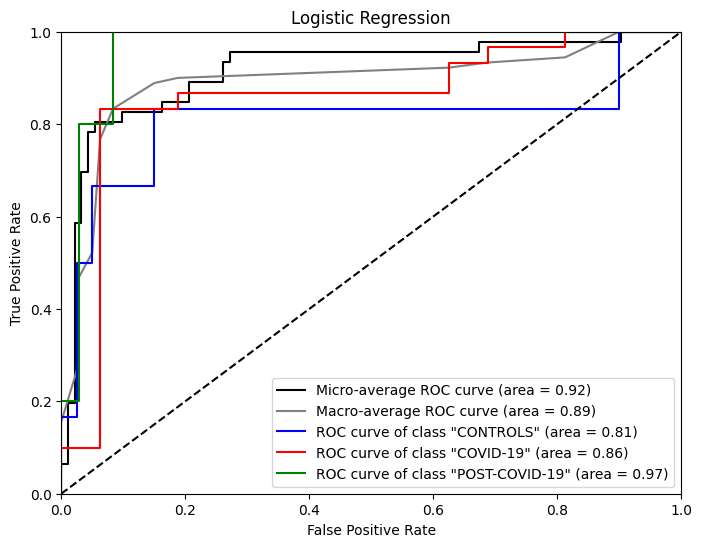

In [ ]:
# Define class names
class_names = ['CONTROLS', 'COVID-19', 'POST-COVID-19']

# Define colors for each class ROC curve
class_colors = ['blue', 'red', 'green']  # Customize colors for each class ROC curve

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_scores.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro), color='black')
plt.plot(fpr_macro, tpr_macro, label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_macro), color='gray')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class "{0}" (area = {1:0.2f})'.format(class_names[i], roc_auc[i]), color=class_colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.legend(loc='lower right')
plt.savefig('ROC_LOGREG.png', dpi=600)
plt.show()

#SAVED MODELS

In [ ]:
joblib.dump(rf_model, 'random_forest_model_multiclassml.joblib')
##LOAD MODEL IF YOU WANT

#loaded_model = joblib.load('random_forest_model_long_covid.joblib')
#new_data_predictions = loaded_model.predict(new_data)


['random_forest_model_multiclassml.joblib']

In [ ]:
#save_model xgb

joblib.dump(xgb_model, 'xgb_model_multiclassml.joblib')
##LOAD MODEL IF YOU WANT

#loaded_model = joblib.load('xgb_model_long_covid.joblib')
#new_data_predictions = loaded_model.predict(new_data)


['xgb_model_multiclassml.joblib']

In [ ]:
#save_model xgb

joblib.dump(svm_model, 'svm_model_multiclassml.joblib')
##LOAD MODEL IF YOU WANT

#loaded_model = joblib.load('svm_model_long_covid.joblib')
#new_data_predictions = loaded_model.predict(new_data)


['svm_model_multiclassml.joblib']

In [ ]:
#save_model xgb


joblib.dump(logreg_model, 'logreg_model_multiclassml.joblib')
##LOAD MODEL IF YOU WANT

#loaded_model = joblib.load('logreg_model_long_covid.joblib')
#new_data_predictions = loaded_model.predict(new_data)


['logreg_model_multiclassml.joblib']